## Carregando os dados

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
from google.colab import drive
drive.mount('/content/drive')

# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

#importando o arquivo
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/index.csv', sep=',')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

## Pré-processamento: tratamento de atributos com valores ausentes

In [61]:
# índices das linhas que contém valores NaN
idxRowNan = pd.isnull(df).any(axis=1).to_numpy().nonzero()

# imprime apenas as linhas com valoes ausentes
display(df.iloc[idxRowNan])

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker


## Pré-processamento: tratamento de dados inconsistentes ou redundantes

In [62]:
df_duplicates = df[ df.duplicated(subset=['Account Balance', 'Duration of Credit (month)', 'Payment Status of Previous Credit','Purpose',
                                          'Credit Amount', 'Value Savings/Stocks', 'Length of current employment', 'Instalment per cent',
                                          'Sex & Marital Status', 'Guarantors', 'Duration in Current address', 'Most valuable available asset',
                                          'Age (years)', 'Concurrent Credits', 'Type of apartment', 'No of Credits at this Bank', 'Occupation',
                                          'No of dependents', 'Telephone', 'Foreign Worker'],keep=False)]

# se houver valores redundantes ou inconsistentes, imprima
if len(df_duplicates)>0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')

Não existem valores duplicados


In [63]:
df_duplicates = df[ df.duplicated(subset=['Account Balance', 'Duration of Credit (month)', 'Payment Status of Previous Credit','Purpose',
                                          'Credit Amount', 'Value Savings/Stocks', 'Length of current employment', 'Instalment per cent',
                                          'Sex & Marital Status', 'Guarantors', 'Duration in Current address', 'Most valuable available asset',
                                          'Age (years)', 'Concurrent Credits', 'Type of apartment', 'No of Credits at this Bank', 'Occupation',
                                          'No of dependents', 'Telephone', 'Foreign Worker'],keep=False)]

# se tiver valores inconsistentes, imprime
if len(df_duplicates)>0:
   print('\nAmostras inconsistentes:')
   display(df_duplicates)
else:
   print('Não existem amostras inconsistentes')


Não existem amostras inconsistentes


In [64]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df.describe()

display(df_detalhes)


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


## Pré-processamento: normalização dos atributos

In [65]:
def normalizar(X):
   """
   Normaliza os atributos em X

   Esta função retorna uma versao normalizada de X onde o valor da
   média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
   um importante passo de pré-processamento quando trabalha-se com
   métodos de aprendizado de máquina.
   """

   m, n = X.shape # m = qtde de objetos e n = qtde de atributos por objeto

   # Incializa as variaves de saída
   X_norm = np.random.rand(m,n) # inicializa X_norm com valores aleatórios
   mu = 0 # inicializa a média
   sigma = 1 # inicializa o desvio padrão

   mu = np.mean(X, axis=0)
   sigma = np.std(X, axis=0, ddof=1)

   for i in range(m):
       X_norm[i,:] = (X[i,:]-mu) / sigma


   return X_norm, mu, sigma


# coloca os valores dos atributos na variável X
X = df.iloc[:,1:].values

# chama a função para normalizar X
X_norm, mu, sigma = normalizar(X)

df.iloc[:,1:] = X_norm

print('\nPrimeira amostra da base antes da normalização: [%2.4f %2.4f].' %(X[0,0],X[0,1]))
print('\nApós a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].')
print('\nPrimeira amostra da base após normalização: [%2.4f %2.4f].' %(X_norm[0,0],X_norm[0,1]))




Primeira amostra da base antes da normalização: [1.0000 18.0000].

Após a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].

Primeira amostra da base após normalização: [-1.2539 -0.2407].


In [66]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df.describe()

display(df_detalhes.round(8))

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
std,0.458487,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
min,0.000000,-1.253938,-1.401713,-2.349694,-1.030447,-1.070320,-0.699357,-1.973010,-1.763631,-2.375438,...,-1.671623,-1.293076,-1.457102,-2.373863,-1.750329,-0.704573,-2.913034,-0.428075,-0.822906,-0.195916
25%,0.000000,-1.253938,-0.738298,-0.503176,-0.666074,-0.675138,-0.699357,-0.317800,-0.869748,-0.963168,...,-0.765594,-1.293076,-0.752422,0.460600,0.135801,-0.704573,0.146876,-0.428075,-0.822906,-0.195916
50%,1.000000,-0.458797,-0.240737,-0.503176,-0.301701,-0.337170,-0.699357,-0.317800,0.024135,0.449102,...,0.140434,-0.340885,-0.223912,0.460600,0.135801,-0.704573,0.146876,-0.428075,-0.822906,-0.195916
75%,1.000000,1.131486,0.256825,1.343342,0.062672,0.248340,0.566448,1.337409,0.918018,0.449102,...,1.046463,0.611307,0.568853,0.460600,0.135801,1.026565,0.146876,-0.428075,1.213990,-0.195916
max,1.000000,1.131486,4.237315,1.343342,2.613284,5.368078,1.832252,1.337409,0.918018,1.861371,...,1.046463,1.563498,3.475658,0.460600,2.021932,4.488843,1.676831,2.333701,1.213990,5.099118


## Pré-processamento: detecção de *outliers*

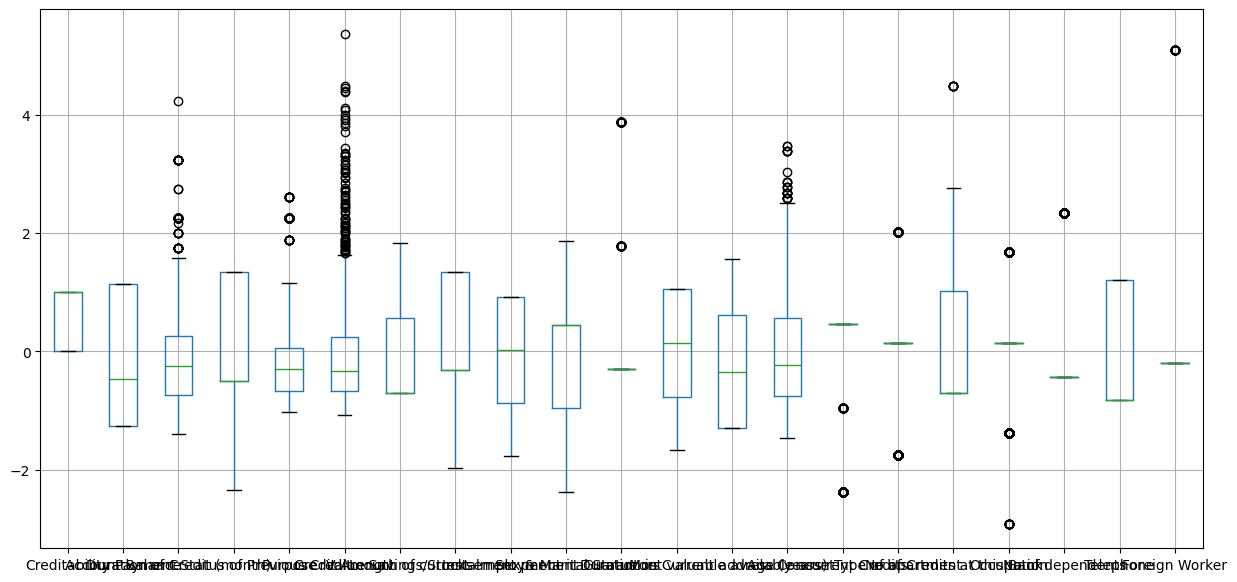

In [67]:
# gera um bloxplot para cada atributo
df.boxplot(figsize=(15,7))
plt.show()


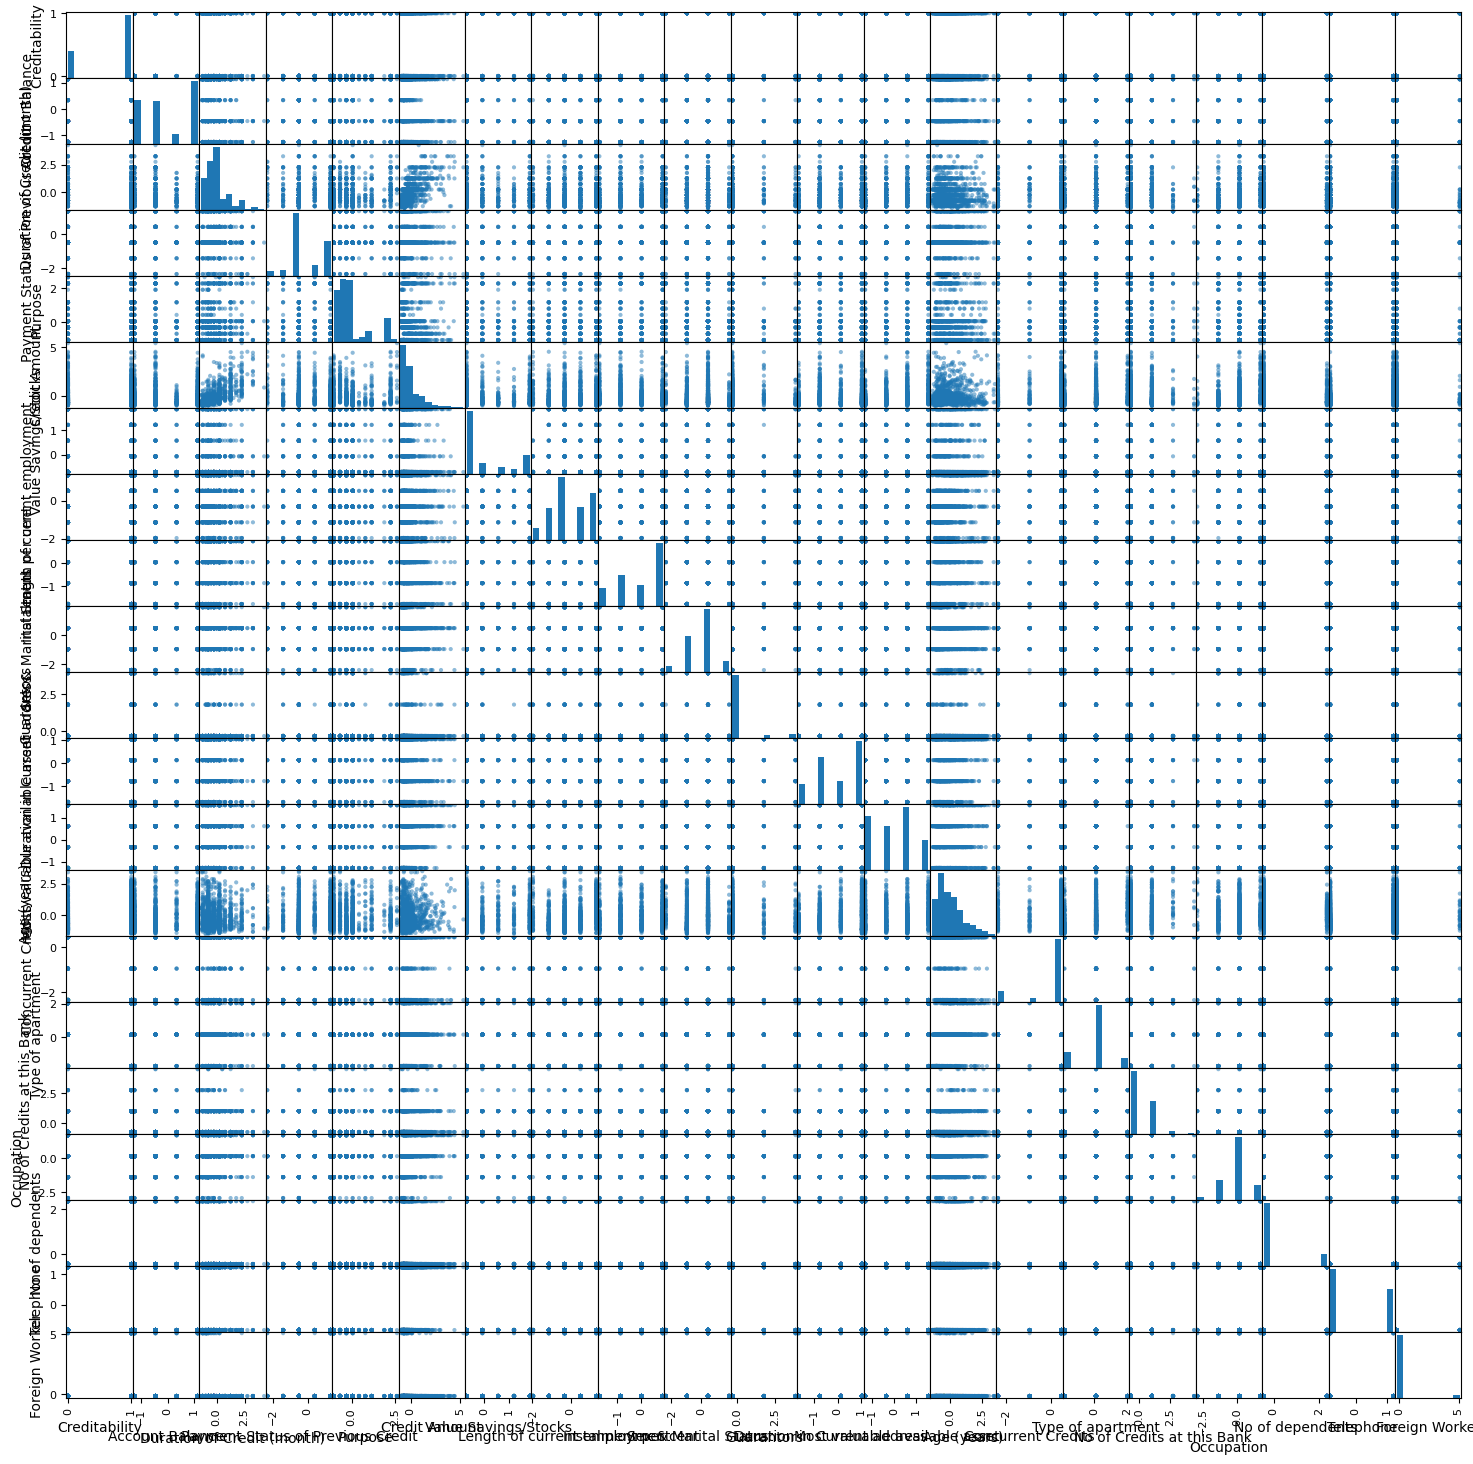

In [68]:
pd.plotting.scatter_matrix(df, figsize=(18,18))
plt.show()


In [69]:
# matriz de gráficos scatter
sns.pairplot(df, hue='Creditability', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()


Output hidden; open in https://colab.research.google.com to view.

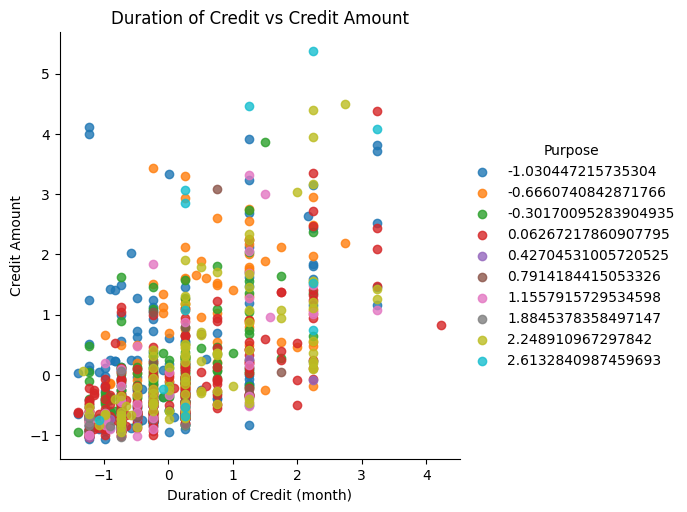

In [70]:
# define o scatter plot
sns.lmplot(x='Duration of Credit (month)', y='Credit Amount', data=df,
          fit_reg=False,
          hue='Purpose')

# cria um título para o gráfico
plt.title('Duration of Credit vs Credit Amount')

# mostra o gráfico
plt.show()


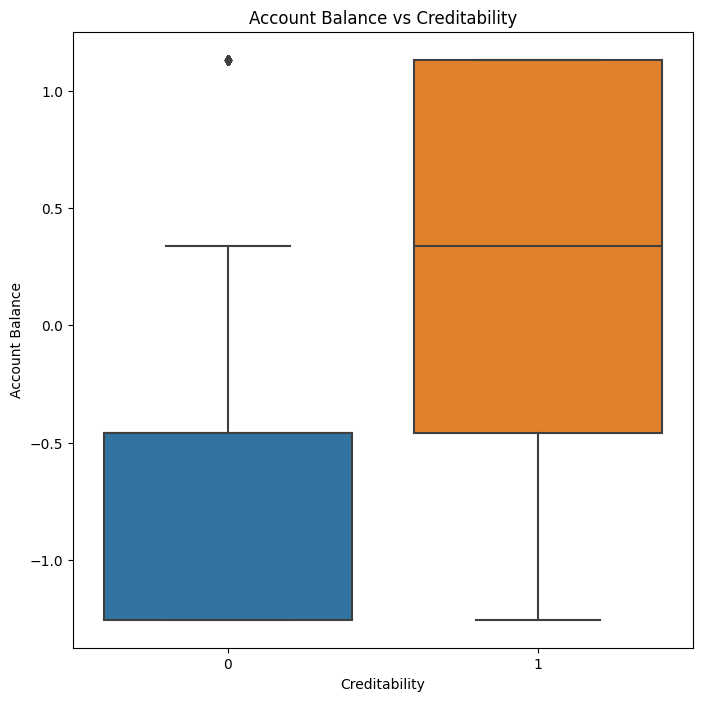

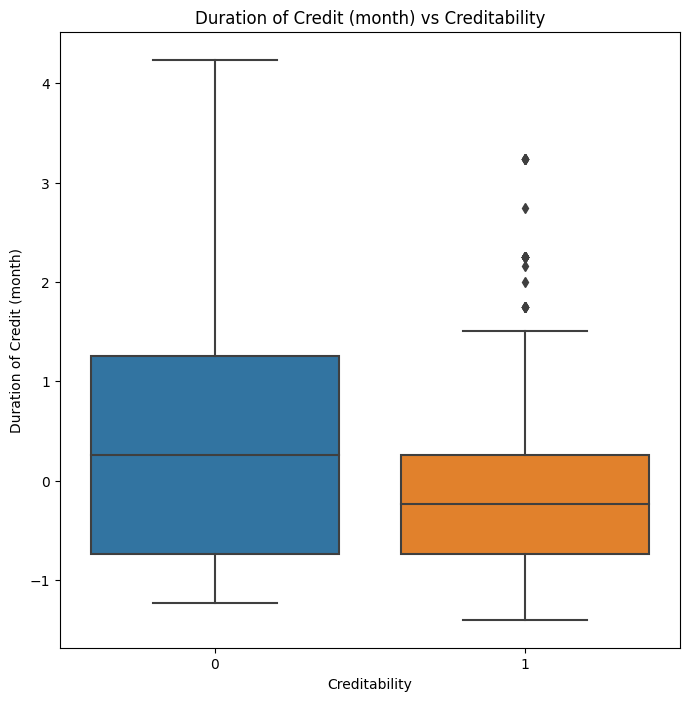

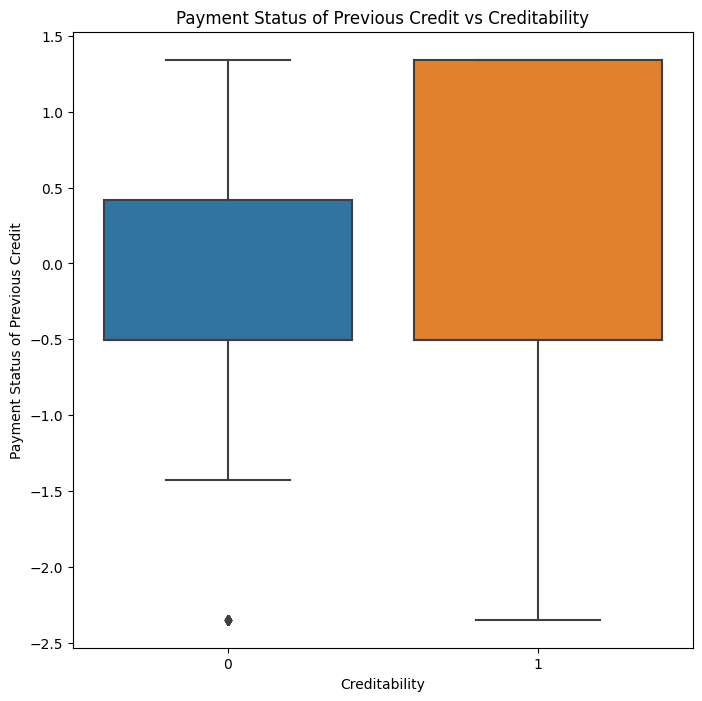

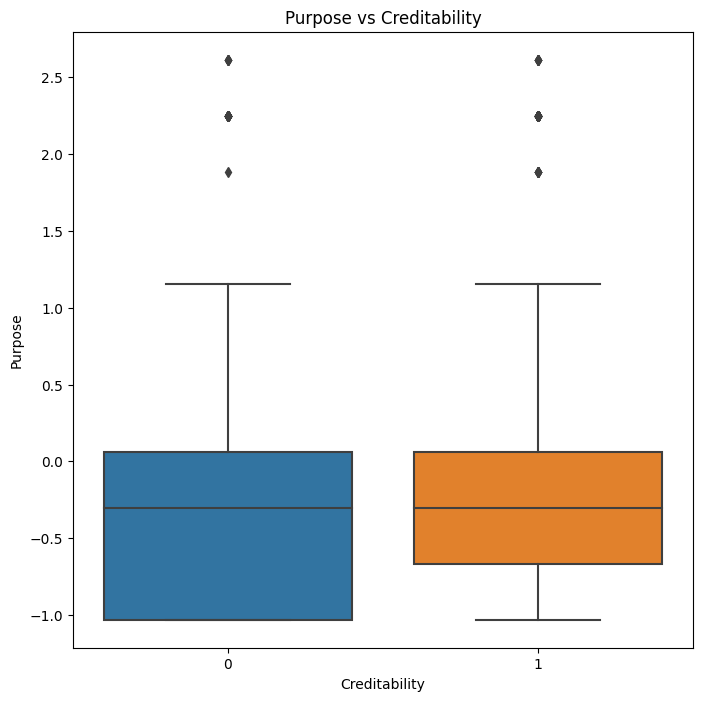

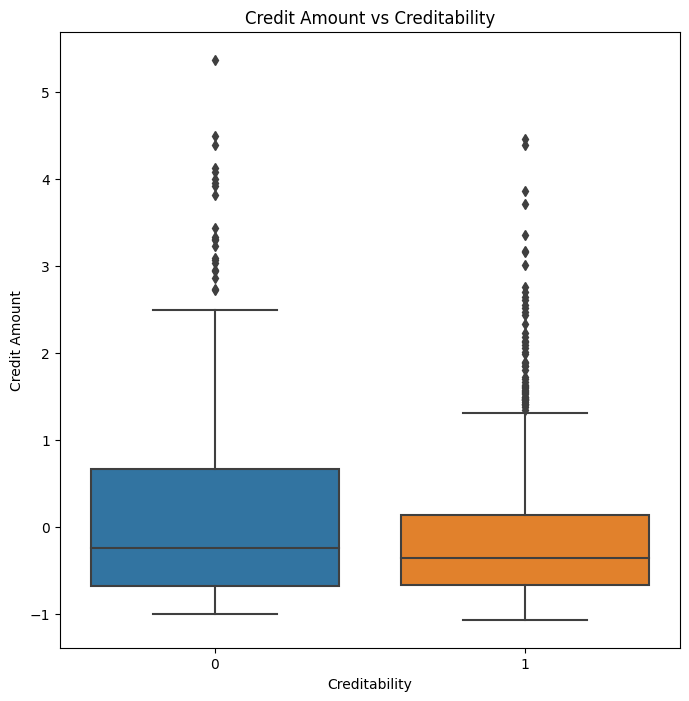

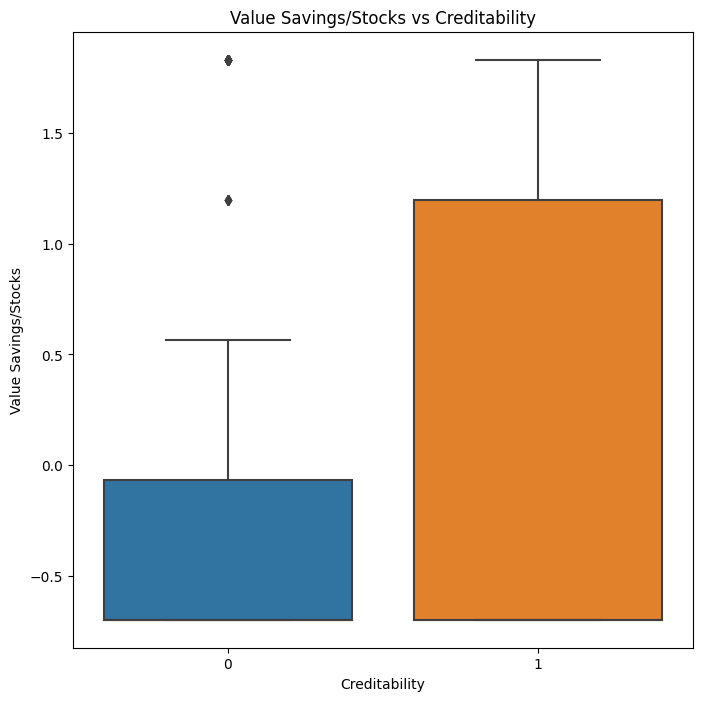

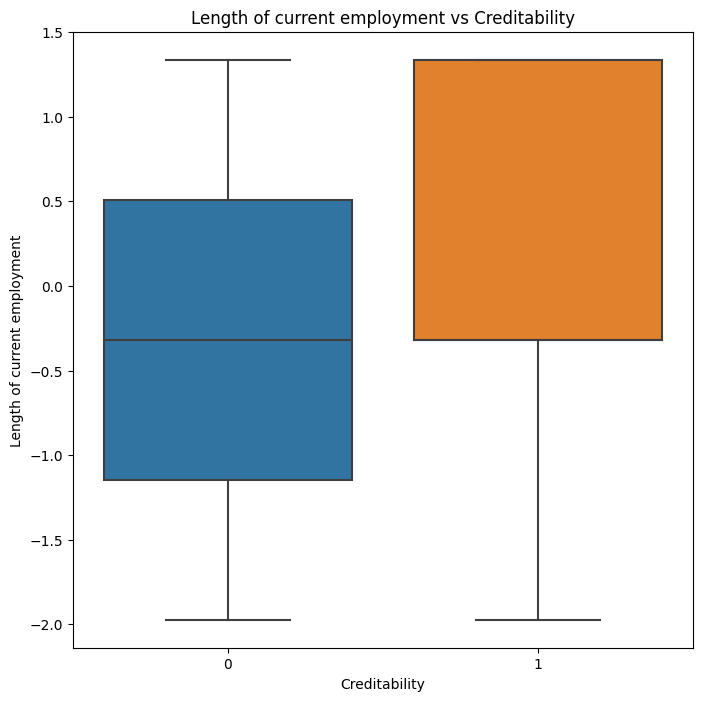

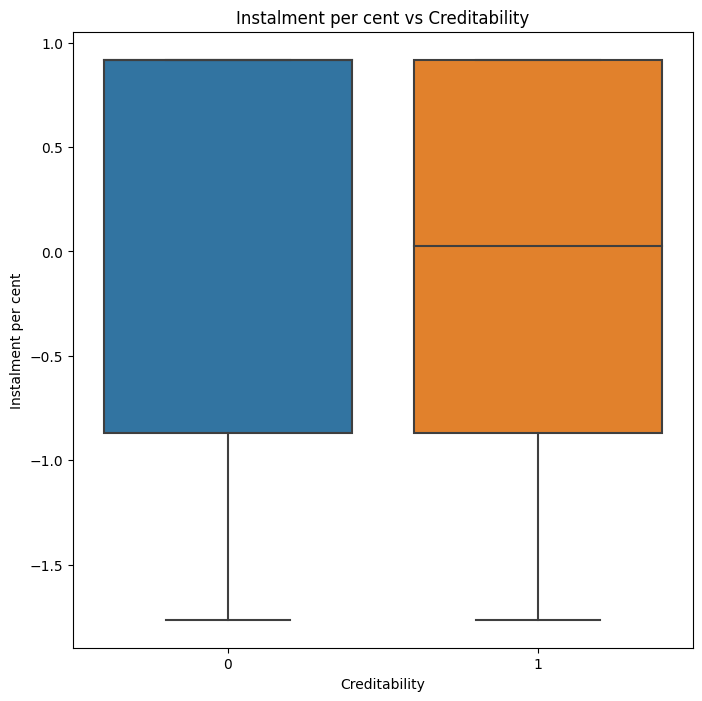

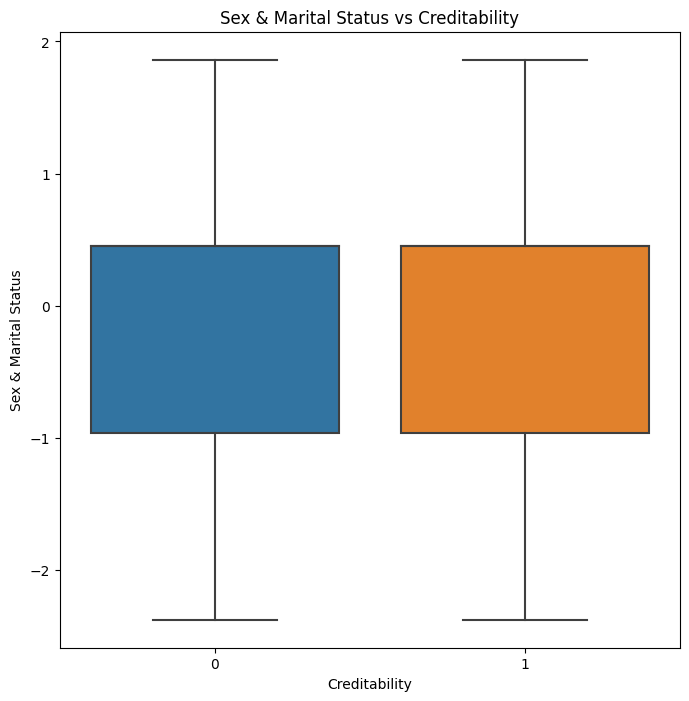

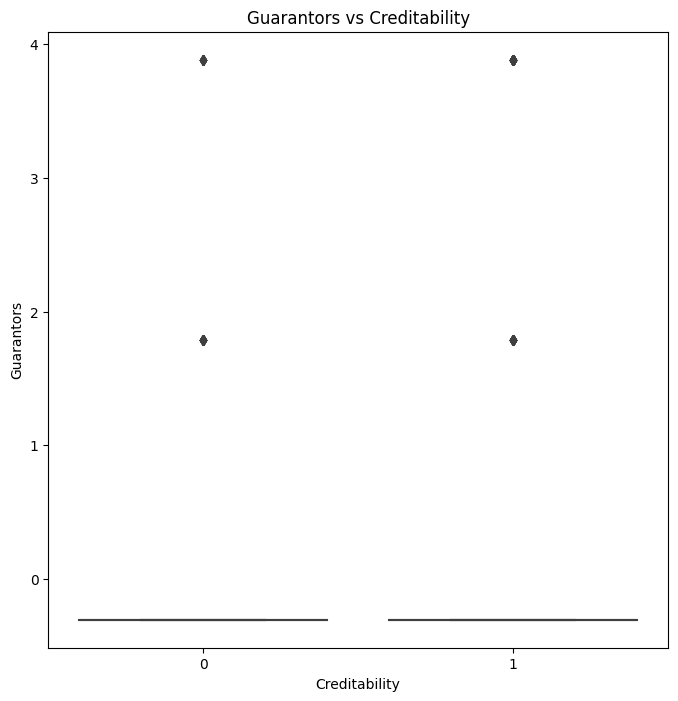

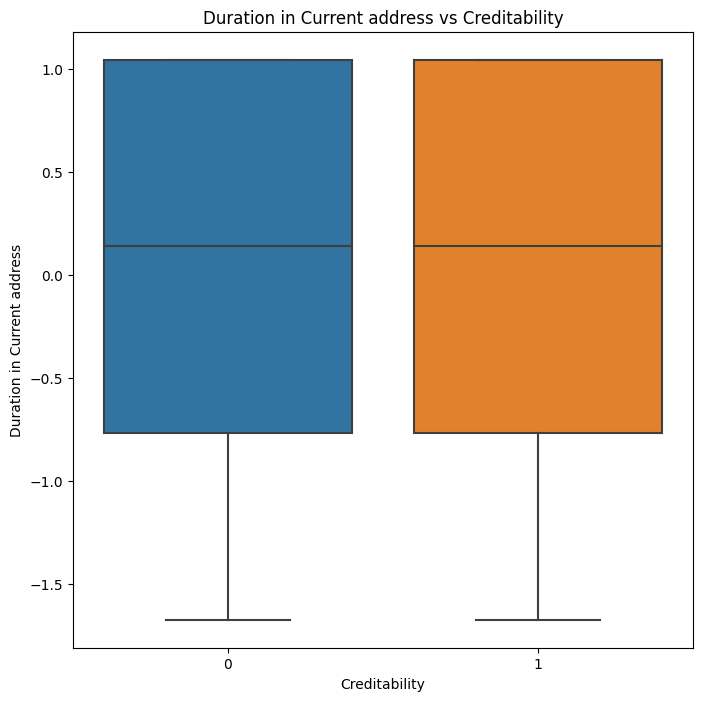

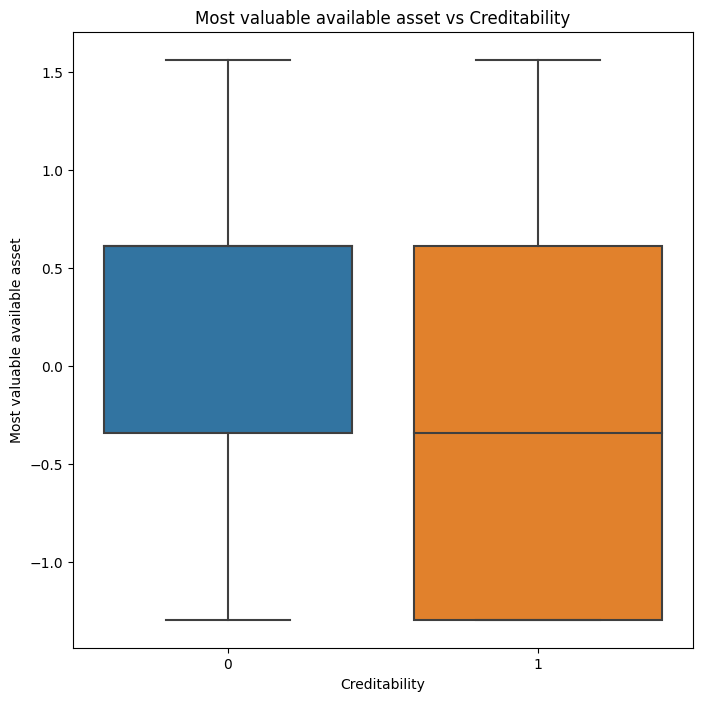

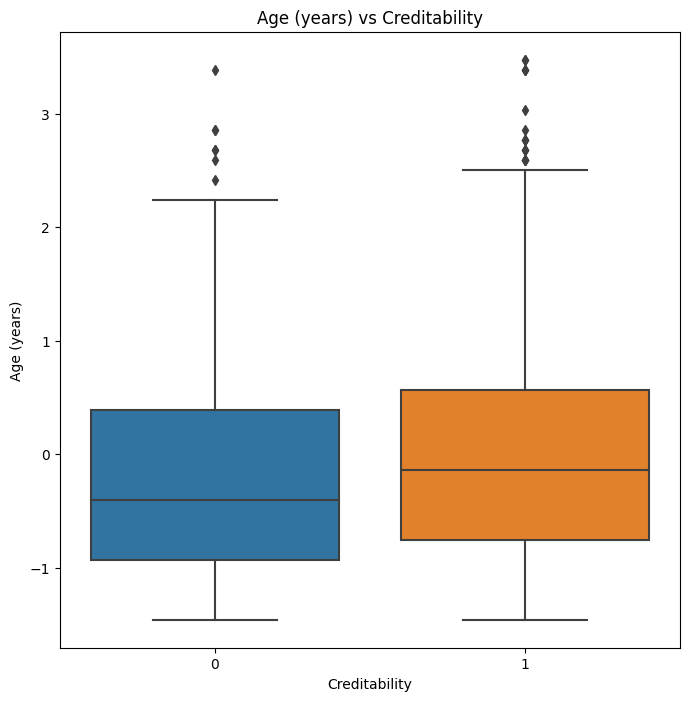

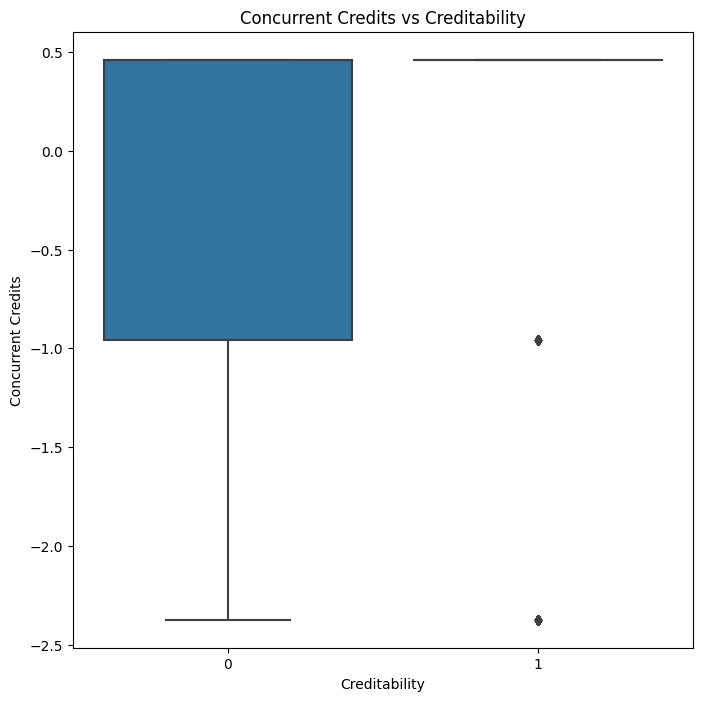

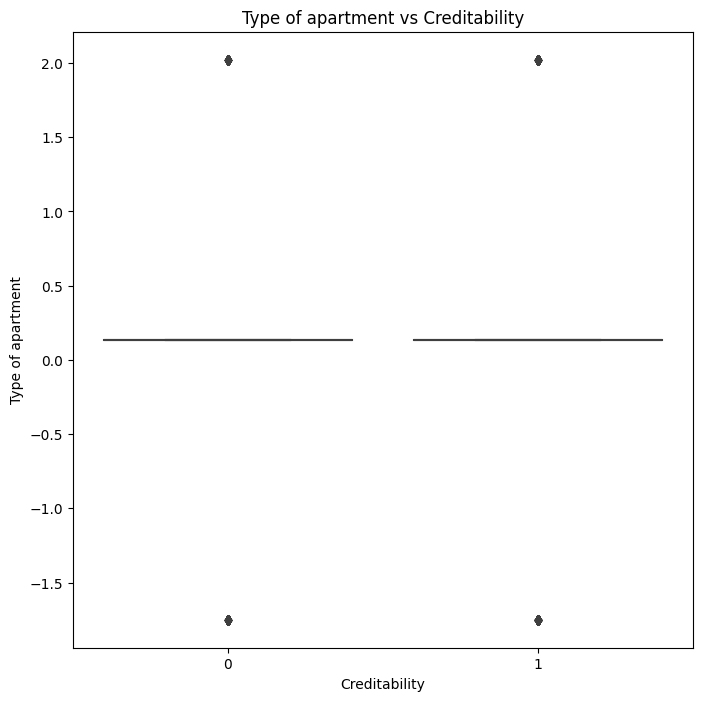

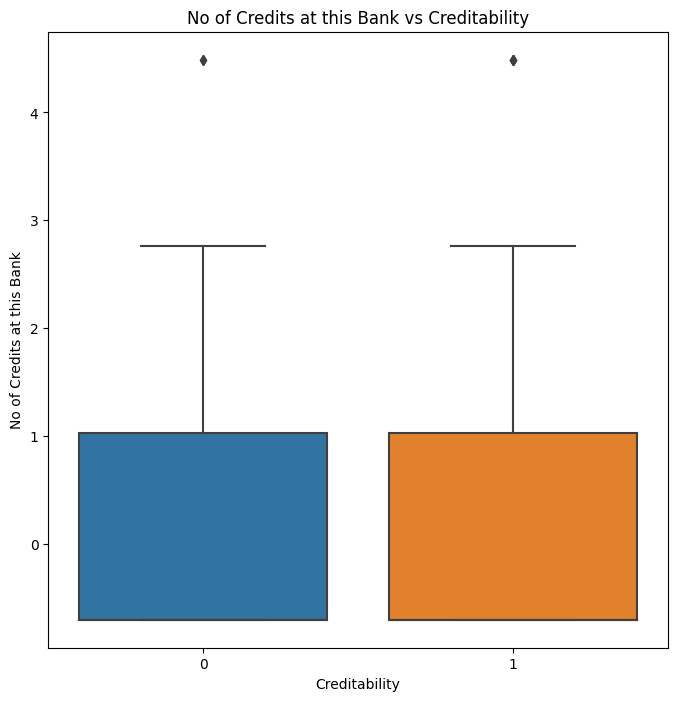

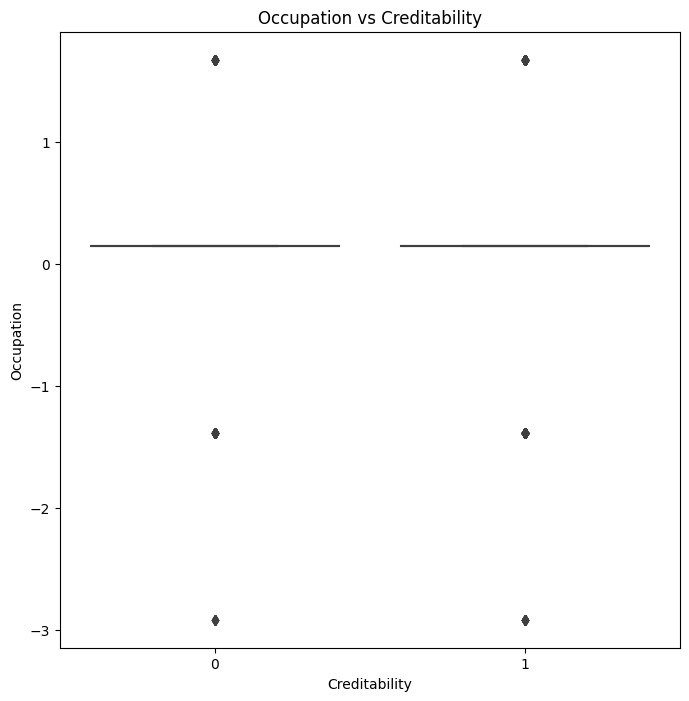

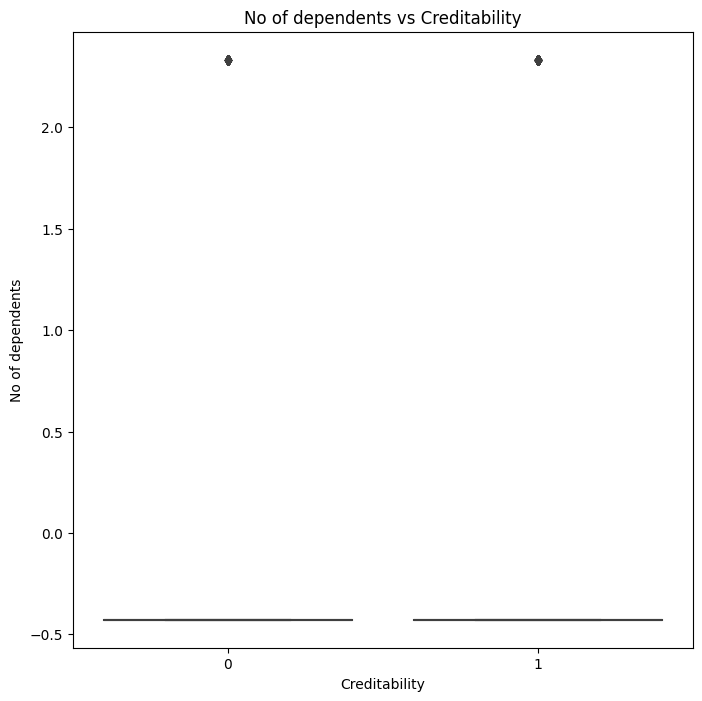

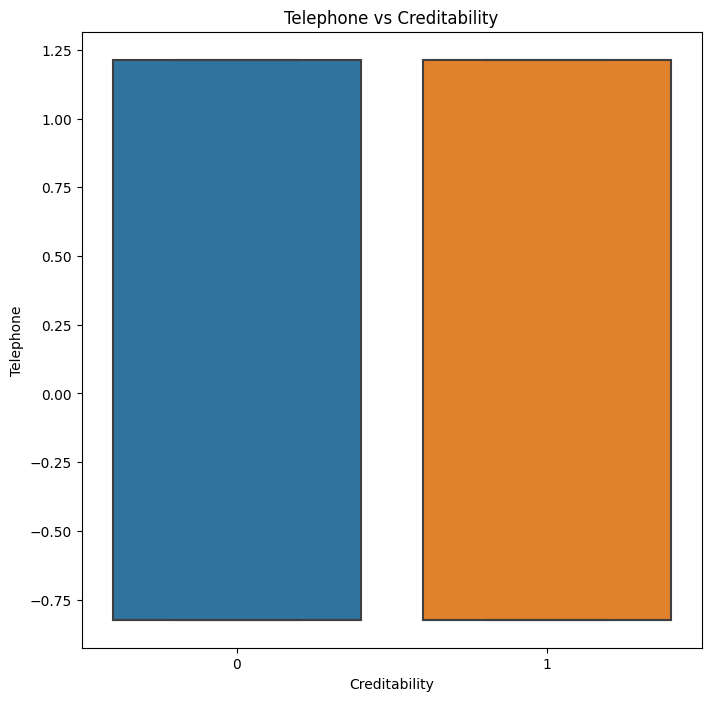

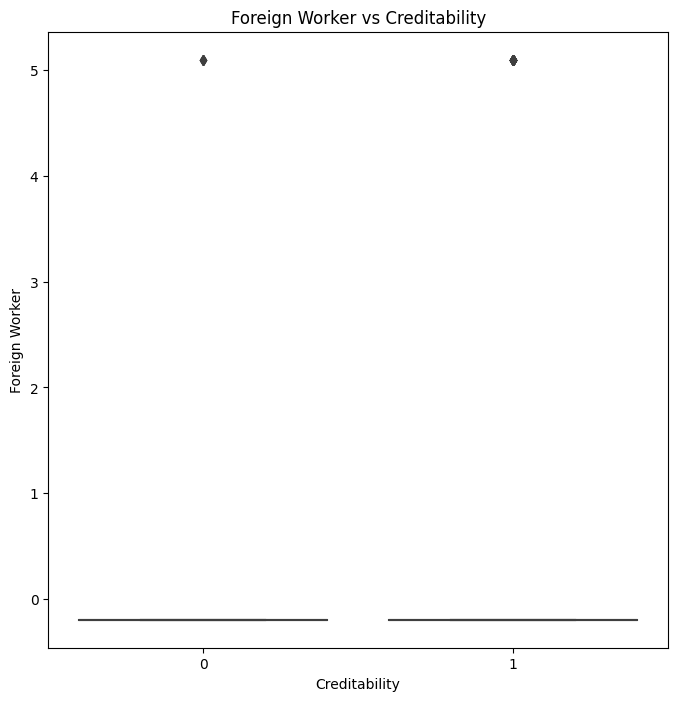

In [71]:
for atributo in df.columns[1:]:
   # define a dimensão do gráfico
   plt.figure(figsize=(8,8))

   # cria o boxplot
   sns.boxplot(x="Creditability", y=atributo, data=df, whis=1.5)

   # adiciona o título ao gráfico
   plt.title(f'{atributo} vs Creditability')

   # mostra o gráfico
   plt.show()


In [72]:
def removeOutliers(df):
   """
   Remove os outliers da base de dados
   """

   for atributo in df.columns[1:]:

       # obtem o terceiro e o primeiro quartil.
       q75, q25 = np.percentile(df[atributo].values, [75 ,25])

       # calcula o IQR
       IQR = q75 - q25

       # remove os outliers com base no valor do IQR
       df = df[ (df[atributo]<=(q75+1.5*IQR)) & (df[atributo]>=(q25-1.5*IQR)) ]

   return df

# remove os outliers
df = removeOutliers(df)

# apresenta as principais estatísticas sobre a base de dados
df.boxplot(figsize=(15,7))
plt.show()

# matriz de gráficos scatter
sns.pairplot(df, hue='Creditability', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()



Output hidden; open in https://colab.research.google.com to view.

## Pré-processamento: distribuição das classes

1    196
0     51
Name: Creditability, dtype: int64

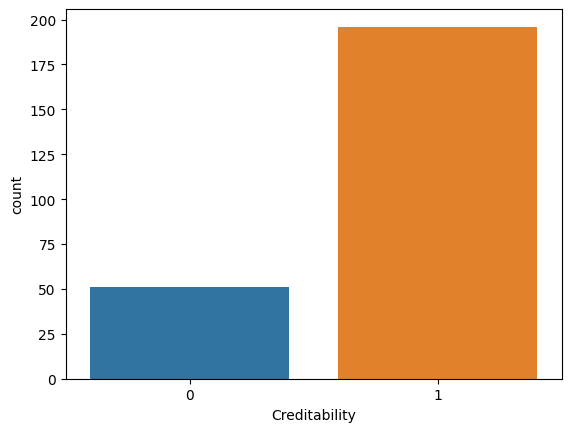

In [73]:
display(df['Creditability'].value_counts())

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="Creditability", data=df)

# mostra o gráfico
plt.show()

## Pré-processamento: correlação entre os atributos

In [74]:
# criando uma matriz X com os valores do data frame
X = df.iloc[:, 1:].values

# matriz de correlação
correlation = np.corrcoef(X, rowvar=False)

print('\n\nMatriz de correlação: ')
display(correlation)



Matriz de correlação: 


array([[ 1.00000000e+00,  5.54201172e-02,  1.98827710e-01,
         1.12507430e-01,  2.55979749e-02,  1.55443203e-01,
         8.48249058e-02,  7.04393554e-02,  7.77337002e-02,
         4.49839207e-16,  3.48529387e-02,  2.01385034e-02,
         1.27820348e-01, -4.49839207e-16, -4.49839207e-16,
         2.01751891e-01, -4.49839207e-16,  4.49839207e-16,
         1.17968262e-01,  4.49839207e-16],
       [ 5.54201172e-02,  1.00000000e+00, -1.02979916e-02,
        -2.67928514e-02,  4.97544269e-01,  8.05674226e-02,
         3.63319095e-02,  2.00006822e-01,  7.48334283e-02,
         5.57703553e-17,  1.43456924e-01,  1.42195315e-01,
        -5.13281410e-02, -5.57703553e-17, -5.57703553e-17,
         1.48301802e-02, -5.57703553e-17,  5.57703553e-17,
         7.12594678e-02,  5.57703553e-17],
       [ 1.98827710e-01, -1.02979916e-02,  1.00000000e+00,
        -7.89294796e-02, -1.08393942e-03,  4.13027825e-02,
         2.20938666e-01,  1.02647740e-01, -1.27851098e-02,
        -1.86115256e-16,  1.5

In [75]:
# matriz de correlação
df_correlation = df.corr()

print('\n\nMatriz de correlação: ')
display(df_correlation)



Matriz de correlação: 


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
Creditability,1.000000,0.437152,-0.004722,0.285052,-0.013974,0.034871,0.118160,0.202796,0.004769,0.128542,...,0.069395,0.028975,0.215161,NaN,NaN,0.116855,NaN,NaN,0.104733,NaN
Account Balance,0.437152,1.000000,0.055420,0.198828,0.112507,0.025598,0.155443,0.084825,0.070439,0.077734,...,0.034853,0.020139,0.127820,NaN,NaN,0.201752,NaN,NaN,0.117968,NaN
Duration of Credit (month),-0.004722,0.055420,1.000000,-0.010298,-0.026793,0.497544,0.080567,0.036332,0.200007,0.074833,...,0.143457,0.142195,-0.051328,NaN,NaN,0.014830,NaN,NaN,0.071259,NaN
Payment Status of Previous Credit,0.285052,0.198828,-0.010298,1.000000,-0.078929,-0.001084,0.041303,0.220939,0.102648,-0.012785,...,0.150820,0.030921,0.214246,NaN,NaN,0.540605,NaN,NaN,0.124380,NaN
Purpose,-0.013974,0.112507,-0.026793,-0.078929,1.000000,-0.078938,-0.041214,-0.011640,0.028060,-0.079407,...,-0.077837,0.033909,-0.053503,NaN,NaN,-0.052995,NaN,NaN,-0.148763,NaN
Credit Amount,0.034871,0.025598,0.497544,-0.001084,-0.078938,1.000000,0.032743,0.034695,-0.303639,0.021263,...,0.070376,0.276724,-0.026640,NaN,NaN,-0.029545,NaN,NaN,0.155564,NaN
Value Savings/Stocks,0.118160,0.155443,0.080567,0.041303,-0.041214,0.032743,1.000000,0.194675,0.033559,0.082047,...,0.048941,0.071722,0.119072,NaN,NaN,-0.002646,NaN,NaN,0.093838,NaN
Length of current employment,0.202796,0.084825,0.036332,0.220939,-0.011640,0.034695,0.194675,1.000000,0.115910,0.184848,...,0.326436,0.126972,0.329679,NaN,NaN,0.179998,NaN,NaN,0.094940,NaN
Instalment per cent,0.004769,0.070439,0.200007,0.102648,0.028060,-0.303639,0.033559,0.115910,1.000000,0.111667,...,0.052840,-0.185917,0.049465,NaN,NaN,0.081998,NaN,NaN,-0.043390,NaN
Sex & Marital Status,0.128542,0.077734,0.074833,-0.012785,-0.079407,0.021263,0.082047,0.184848,0.111667,1.000000,...,-0.060544,-0.024093,-0.033312,NaN,NaN,0.027310,NaN,NaN,0.044472,NaN


In [76]:
#data = df.drop(columns=['Guarantors', 'Concurrent Credits',  'Type of apartment', 'Occupation', 'No of dependents', 'Foreign Worker'])

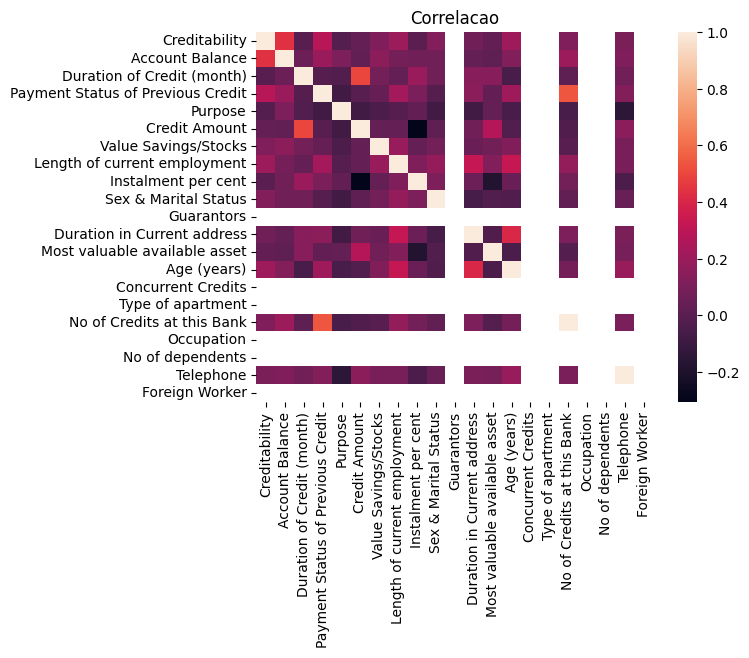

In [77]:
# cria um mapa de cores dos valores da correlação
sns.heatmap(df_correlation,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlacao')
plt.show()

In [79]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/credit.csv', index=False)
#data.to_csv('/content/drive/MyDrive/Colab Notebooks/credit.csv', index=False)